<a href="https://colab.research.google.com/github/SHIVANKARSHIVANKAR/Time_series_Coursera/blob/main/times_series_w1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras 

Defining the functions:
1.trend in time series.
2.seasonal_pattern in time series.
3.sensonality
4.noise


In [ ]:
def trend(time,slope=0):
  return time*slope

def seasonal_pattern(seasonal_time):
  return np.where(seasonal_time<0.1,np.cos(seasonal_time*7*np.pi),1/np.exp(5*seasonal_time))

def seasonality(time,period,amplitude=1,phase=0):
  seasonal_time=((time+phase)%period)/period
  return amplitude*seasonal_pattern(seasonal_time)

def noise(time,noise_level=1,seed=None):
  rnd=np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

def plot_series(time,series,format="-",title="",label=None, start=0,end=None):
  plt.plot(time[start:end],series[start:end],format,label=label)
  plt.xlabel('Time')
  plt.ylabel('Values')
  plt.title(title)
  if label:
    plt.legend()
  plt.grid(True)

Plotting the function to visualize

<function matplotlib.pyplot.show>

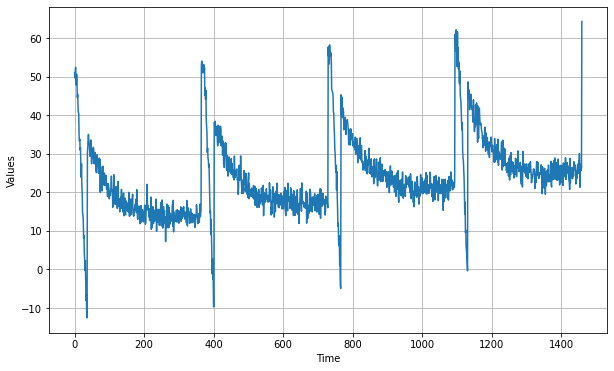

In [ ]:
TIME = np.arange(4 * 365 + 1, dtype="float32")
#Series straight line values
y_intercept=10
slope=0.01
SERIES=trend(TIME,slope)+y_intercept
#Adding Seasonality
amplitude=40
SERIES+=seasonality(TIME,period=365,amplitude=amplitude)
#Adding some noise
noise_level=2
SERIES+=noise(TIME,noise_level=noise_level,seed=42)

#plotting graph
plt.figure(figsize=(10,6))
plot_series(TIME,SERIES)
plt.show


In [ ]:
# Defining the split time
SPLIT_TIME=1100
print(len(SERIES[0:SPLIT_TIME]))
print(len(TIME-SPLIT_TIME))

1100
1461


Defining the splting of dataset

In [ ]:
from inspect import EndOfBlock
# Defining the split time
SPLIT_TIME=1100
# Function for the split
def train_val_split(time,series,time_step=SPLIT_TIME):
  time_train=time[0:SPLIT_TIME]
  series_train=series[0:SPLIT_TIME]
  time_valid=time[SPLIT_TIME:]
  series_valid=series[SPLIT_TIME:]
  return time_train,series_train,time_valid,series_valid

Testing the function

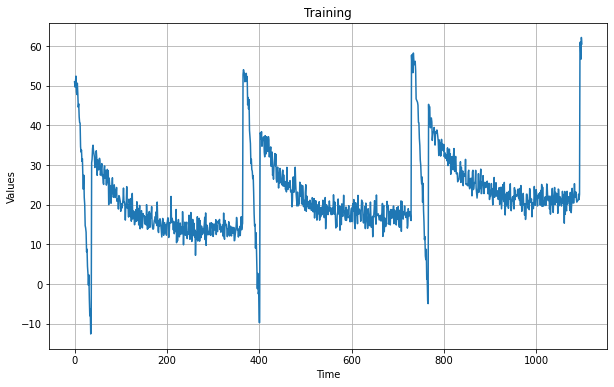

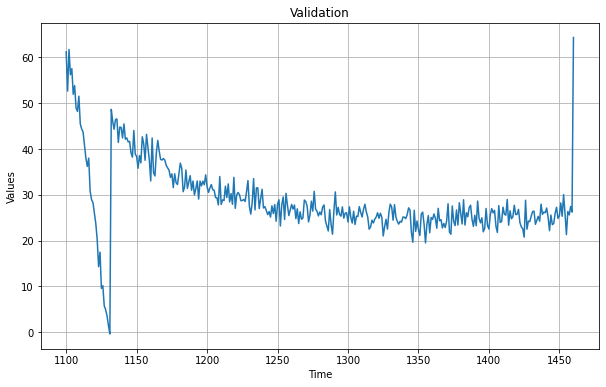

In [ ]:
time_train,series_train,time_valid,series_valid=train_val_split(TIME,SERIES,)
plt.figure(figsize=(10,6))
plot_series(time_train,series_train,title='Training')
plt.show()

plt.figure(figsize=(10,6))
plot_series(time_valid,series_valid,title="Validation")
plt.show()

# Computing meterics

In [ ]:
from matplotlib.colorbar import make_axes
def compute_metrics(true_series,forcast):
  mse=np.sum((true_series-forcast)**2)/len(true_series)
  mae=np.sum(np.abs(true_series-forcast))/len(true_series)
  return mse,mae
# dummy series
zeros=np.zeros(5)
ones=np.ones(5)
mse,mae=compute_metrics(zeros,ones)
print(f"mse:{mse},mae={mae} for the series of zeros and prediction of ones" )
print(f"meterics are mumpy numeric types:{np.issubdtype(type(mse),np.number)}")

mse:1.0,mae=1.0 for the series of zeros and prediction of ones
meterics are mumpy numeric types:True


#Forcasting

361
validation series has shape:(361,)
naive forcast has shape:(361,)


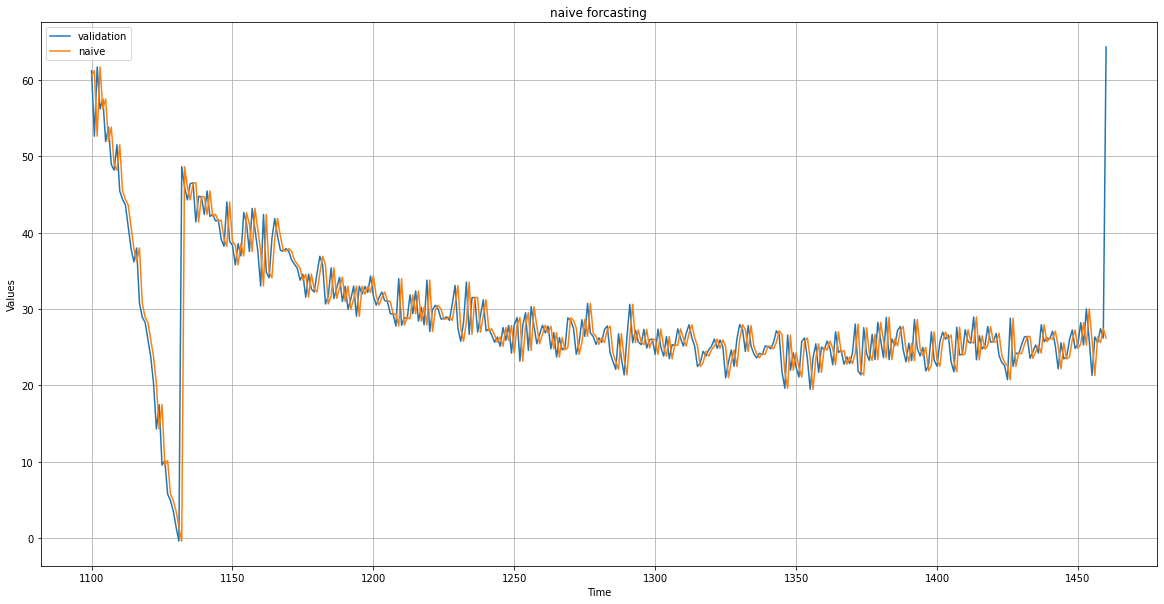

In [ ]:
naive_forcasting=SERIES[(SPLIT_TIME-1):-1]
print(len(naive_forcasting))
print(f"validation series has shape:{series_valid.shape}")
print(f"naive forcast has shape:{naive_forcasting.shape}")
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
plot_series(time_valid,series_valid,title='Validation',label='validation')
plot_series(time_valid,naive_forcasting,title='naive forcasting',label='naive')
plt.show()


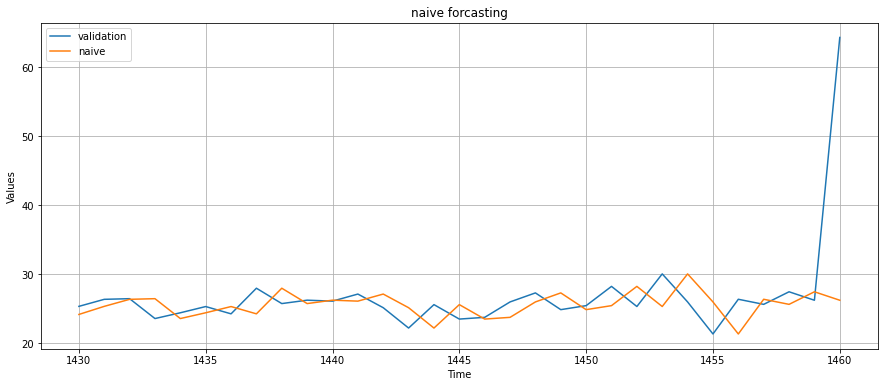

In [ ]:
plt.figure(figsize=(15,6))
plot_series(time_valid,series_valid,title='Validation',label='validation',start=330,end=361)
plot_series(time_valid,naive_forcasting,title='naive forcasting',label='naive',start=330,end=361)

In [ ]:
mse,mae=compute_metrics(series_valid,naive_forcasting)
print(f'mse: {mse:.2f},mae: {mae:.2f} for naive forcasting' )

mse: 19.58,mae: 2.60 for naive forcasting


# Moving average

In [ ]:
def moving_average_forecast(series,window_size):
  forcast=[]
  for time in range(len(series)-window_size):
    forcast.append(series[time:time+window_size].mean())
  np_forcast=np.array(forcast)
  return np_forcast
    

In [ ]:
MOVING_AVERAGE=moving_average_forecast(SERIES,30)
print(f'{MOVING_AVERAGE.shape} \n')


(1431,) 



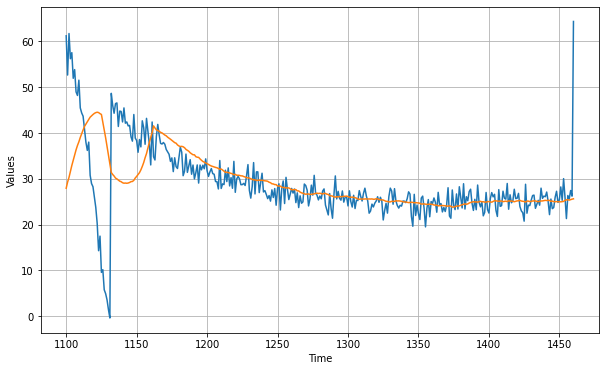

In [ ]:
MOVING_AVERAGE=MOVING_AVERAGE[(1100-30):]
plt.figure(figsize=(10,6))
plot_series(time_valid,series_valid)
plot_series(time_valid,MOVING_AVERAGE)

In [ ]:
mse,mae=compute_metrics(series_valid,MOVING_AVERAGE)
print(f'mse: {mse:.2f},mae: {mae:.2f} for MOVING AVERAGE' )

mse: 65.79,mae: 4.30 for MOVING AVERAGE


#Differencing

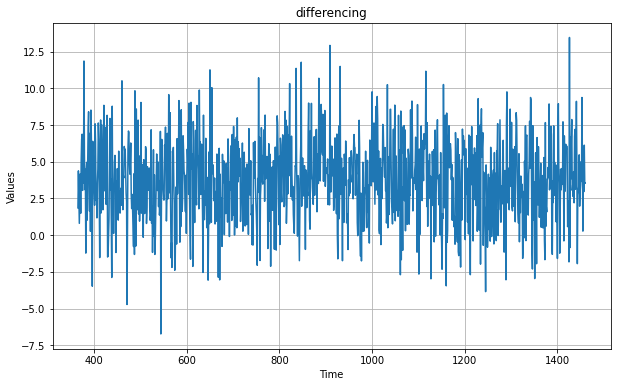

In [ ]:
dif_series=SERIES[365:]-SERIES[:-365]
dif_time=TIME[365:]
plt.figure(figsize=(10,6))
plot_series(dif_time,dif_series,title='differencing')
plt.show()

moving average forcast with diff series has shape: (1046,)
(361,)


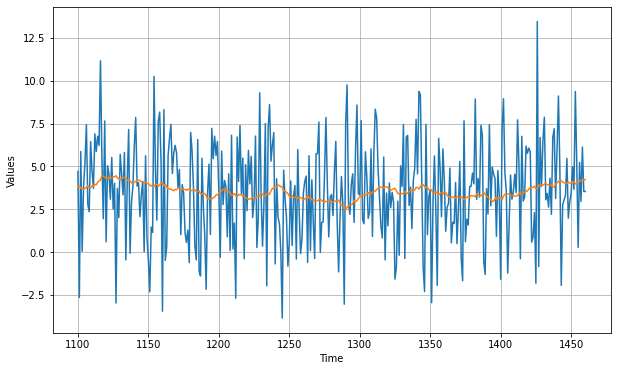

In [ ]:

dif_moving_average=moving_average_forecast(dif_series,50)
print(f"moving average forcast with diff series has shape: {dif_moving_average.shape}")
dif_moving_average=dif_moving_average[1100-365-50:]
print(dif_moving_average.shape)
plt.figure(figsize=(10,6))
plot_series(time_valid,dif_series[1100-365:])
plot_series(time_valid,dif_moving_average)

(361,)
(361,)


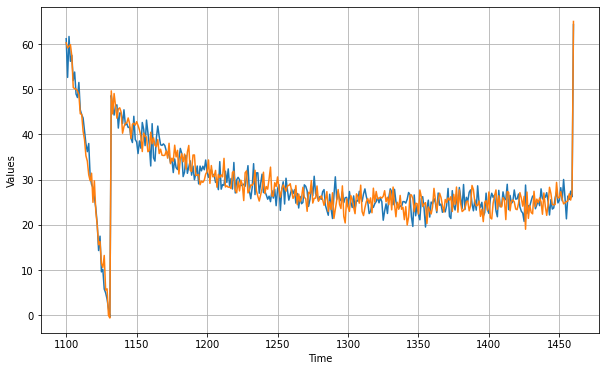

In [ ]:
past_series=SERIES[1100-365:-365]
print(past_series.shape)
dif_moving_avg_plus_past=past_series+dif_moving_average
print(dif_moving_avg_plus_past.shape)
plt.figure(figsize=(10,6))
plot_series(time_valid,series_valid)
plot_series(time_valid,dif_moving_avg_plus_past)

In [ ]:
mse,mae=compute_metrics(series_valid,dif_moving_avg_plus_past)
print(f"mse: {mse} mae: {mae}")

mse: 8.49815440508137 mae: 2.3271792086868075


(361,)
(361,)


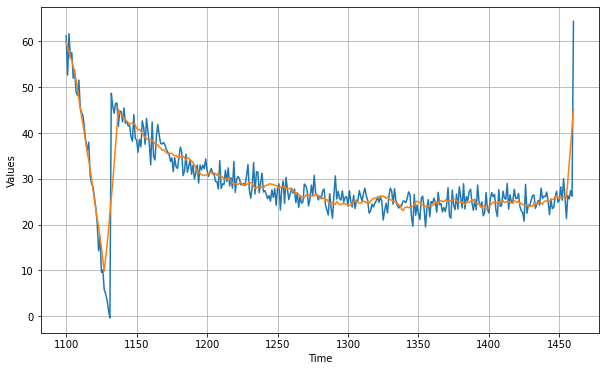

In [ ]:
smooth_past_series=moving_average_forecast(SERIES[1100-370:-360],10)
print(smooth_past_series.shape)
dif_mov_avg_smooth_past=smooth_past_series+dif_moving_average
print(dif_mov_avg_smooth_past.shape)
plt.figure(figsize=(10,6))
plot_series(time_valid,series_valid)
plot_series(time_valid,dif_mov_avg_smooth_past)

In [ ]:
mse,mae=compute_metrics(series_valid,dif_mov_avg_smooth_past)
print(f"mse: {mse} mae: {mae}")

mse: 12.52795782115651 mae: 2.2034435325051938
